@author Gautam Kumar,
Email:gautam.kmr2893@outlook.com

In [227]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split

In [228]:
Rawdata=pd.read_csv("C:\\Users\\gautam.y.kumar\\Desktop\\my data\\house_data.csv")
#Rawdata=Rawdata.notnull()
Rawdata=Rawdata.dropna()
Rawdata

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Apartment,Swimming Pool,Price,Location
0,1340,3,1.00,3,1955,0,1,221900.0,Bangalore
1,1690,3,2.25,3,1951,0,0,538000.0,Bangalore
2,2720,2,1.00,3,1933,0,0,180000.0,Bangalore
3,1360,4,3.00,5,1965,1,1,604000.0,Bangalore
4,1800,3,3.00,3,1987,1,1,510000.0,Bangalore
...,...,...,...,...,...,...,...,...,...
1193,890,2,1.00,3,1924,0,0,406000.0,lucknow
1194,2360,6,2.50,3,1961,0,1,632000.0,lucknow
1195,1630,5,2.75,3,1990,0,1,357000.0,lucknow
1196,1200,3,1.75,3,1964,0,1,361000.0,lucknow


In [229]:
Rawdata['No_Of_Bathrooms']=Rawdata['No_Of_Bathrooms'].apply(np.ceil)
Rawdata.info()
Rawdata.astype(str)
Rawdata.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1197
Data columns (total 9 columns):
Living_Space(sqft)          1197 non-null int64
No_Of_Bedrooms              1197 non-null int64
No_Of_Bathrooms             1197 non-null float64
Condition(on scale of 5)    1197 non-null int64
Year_Build                  1197 non-null int64
Apartment                   1197 non-null int64
Swimming Pool               1197 non-null int64
Price                       1197 non-null float64
Location                    1197 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 93.5+ KB


,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Apartment,Swimming Pool,Price
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1.197000e+03
mean,1980.588972,3.351713,2.360067,3.467836,1968.756892,0.490393,0.509607,5.238719e+05
std,682.545060,0.869845,0.908806,0.684279,28.061183,0.500117,0.500117,3.610749e+05
min,760.000000,0.000000,0.000000,1.000000,1900.000000,0.000000,0.000000,7.500000e+04
25%,1480.000000,3.000000,2.000000,3.000000,1952.000000,0.000000,0.000000,3.090000e+05
50%,1840.000000,3.000000,2.000000,3.000000,1972.000000,0.000000,1.000000,4.350000e+05
75%,2350.000000,4.000000,3.000000,4.000000,1992.000000,1.000000,1.000000,6.300000e+05
max,5790.000000,7.000000,6.000000,5.000000,2015.000000,1.000000,1.000000,5.110000e+06


In [230]:
#Perform  hot encoder
dummies=pd.get_dummies(Rawdata.Location)
#dummies
merge=pd.concat([Rawdata,dummies], axis='columns')
merge

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Apartment,Swimming Pool,Price,Location,Bangalore,Chennai,Kolkata,Mumbai,New Delhi,Patna,lucknow
0,1340,3,1.0,3,1955,0,1,221900.0,Bangalore,1,0,0,0,0,0,0
1,1690,3,3.0,3,1951,0,0,538000.0,Bangalore,1,0,0,0,0,0,0
2,2720,2,1.0,3,1933,0,0,180000.0,Bangalore,1,0,0,0,0,0,0
3,1360,4,3.0,5,1965,1,1,604000.0,Bangalore,1,0,0,0,0,0,0
4,1800,3,3.0,3,1987,1,1,510000.0,Bangalore,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,890,2,1.0,3,1924,0,0,406000.0,lucknow,0,0,0,0,0,0,1
1194,2360,6,3.0,3,1961,0,1,632000.0,lucknow,0,0,0,0,0,0,1
1195,1630,5,3.0,3,1990,0,1,357000.0,lucknow,0,0,0,0,0,0,1
1196,1200,3,2.0,3,1964,0,1,361000.0,lucknow,0,0,0,0,0,0,1


In [231]:
final_merge=merge.drop(['Location','Chennai'],axis='columns')
final_merge

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Apartment,Swimming Pool,Price,Bangalore,Kolkata,Mumbai,New Delhi,Patna,lucknow
0,1340,3,1.0,3,1955,0,1,221900.0,1,0,0,0,0,0
1,1690,3,3.0,3,1951,0,0,538000.0,1,0,0,0,0,0
2,2720,2,1.0,3,1933,0,0,180000.0,1,0,0,0,0,0
3,1360,4,3.0,5,1965,1,1,604000.0,1,0,0,0,0,0
4,1800,3,3.0,3,1987,1,1,510000.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,890,2,1.0,3,1924,0,0,406000.0,0,0,0,0,0,1
1194,2360,6,3.0,3,1961,0,1,632000.0,0,0,0,0,0,1
1195,1630,5,3.0,3,1990,0,1,357000.0,0,0,0,0,0,1
1196,1200,3,2.0,3,1964,0,1,361000.0,0,0,0,0,0,1


In [232]:
corr=Rawdata.corr()

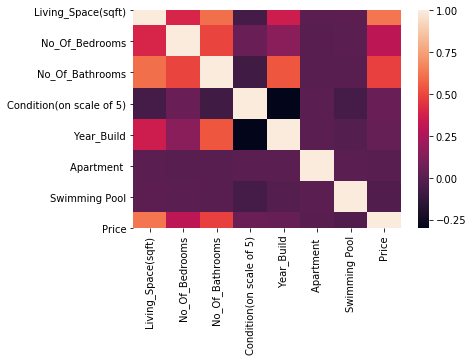

In [233]:
sns.heatmap(corr)

In [234]:
y=final_merge.Price
y

0       221900.0
1       538000.0
2       180000.0
3       604000.0
4       510000.0
          ...   
1193    406000.0
1194    632000.0
1195    357000.0
1196    361000.0
1197    277000.0
Name: Price, Length: 1197, dtype: float64

In [235]:
x=final_merge[["Living_Space(sqft)","No_Of_Bedrooms","No_Of_Bathrooms","Condition(on scale of 5)",
               "Year_Build","Bangalore","Kolkata","Mumbai","New Delhi","Patna","lucknow"]]
x

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Bangalore,Kolkata,Mumbai,New Delhi,Patna,lucknow
0,1340,3,1.0,3,1955,1,0,0,0,0,0
1,1690,3,3.0,3,1951,1,0,0,0,0,0
2,2720,2,1.0,3,1933,1,0,0,0,0,0
3,1360,4,3.0,5,1965,1,0,0,0,0,0
4,1800,3,3.0,3,1987,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1193,890,2,1.0,3,1924,0,0,0,0,0,1
1194,2360,6,3.0,3,1961,0,0,0,0,0,1
1195,1630,5,3.0,3,1990,0,0,0,0,0,1
1196,1200,3,2.0,3,1964,0,0,0,0,0,1


In [257]:
#dividing the data based on testing and training dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=2/3,random_state=0)

In [258]:
#Importing the linear regression model
from sklearn.linear_model import LinearRegression
createmodel=LinearRegression()
createmodel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [259]:
y_predict=createmodel.predict(x_test)
y_predict

array([ 571862.46627852,  537823.17217285,  727800.67035511,
        499156.05776637,  523606.61944708,  430082.08756843,
        555131.85042586,  772027.35042881,  293899.70247305,
        354051.69626137,  459992.16846226,  407495.44501001,
        753030.59057235,  621971.88055215,  789304.38892404,
        614179.95572376,  155290.5237086 ,  610327.17029809,
        317893.82659113, 1067470.28463596,  373552.32158759,
        350847.70285992,  398979.07171468,  364265.25663853,
        273513.25007706,  572099.62058869,  606261.06144817,
       1510423.16670091,  535015.41249945,  320397.80873243,
        326891.16815551,  799778.74187347, 1388663.57486693,
       1188321.9223787 ,  774126.74162876,  674867.17952211,
        595705.01930393,  332538.36485864,  629779.3355678 ,
        489882.84436843,  574039.6528224 ,  663019.06726522,
        646255.81252453,  392168.95120288,  524022.16775455,
        353954.41608321,  170557.03595539,  489676.18869984,
        969510.18633471,

In [260]:
#calculating accuracy of a model
accuracy=createmodel.score(x,y)
accuracy

0.47974898774224956

In [264]:
#calculating the error in the model
error_in_model=1-accuracy
error_in_model

0.5202510122577504

In [266]:
# compute with statsmodels, by adding intercept manually
X1 = sm.add_constant(x)
result = sm.OLS(y, X1).fit()
print (result.rsquared, result.rsquared_adj)

0.48449606759074015 0.4797107990198525


C:\Users\gautam.y.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Conclusion:As we all know that rsquared and rsquared_adj values should be near to one it means the performance of model is perfect but in case of this model the score and performance all is below 50%  so this model can't be deployed into production.


# Challenge:You guys have to improve the accuracy as well the performance??